# Introduction

- This notebook demonstrates Geospatial data analysis to efficiently build a classify and train a model from curated satellite dataset to classify images of agricultural and non-agricultural land
- Demonstrate efficient data loading

In [94]:
%%capture captured_output
import sys
!{sys.executable} -m pip install numpy==1.26
!{sys.executable} -m pip install matplotlib==3.9.2

In [95]:
output_text = captured_output.stdout
lines = output_text.splitlines()
output_last_10_lines = '\n'.join(lines[-10:])
if "error" in output_last_10_lines.lower():
    print("Library installation failed!")
    print("--- Error Details ---")
    print(output_last_10_lines)
else:
    print("Library installation was successful, let's proceed ahead")

Library installation was successful, let's proceed ahead


In [96]:
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [97]:
import os

# Check where we are
print("Current directory:", os.getcwd())

# Always navigate from the base directory
if "SatelliteImageryClassifier" not in os.getcwd():
    print("Navigating to project directory...")
    
    # Go to the correct path
    if "Keras" in os.getcwd():
        os.chdir('./Deep Learning/SatelliteImageryClassifier')
    elif "Deep Learning" in os.getcwd():
        os.chdir('./SatelliteImageryClassifier')
    else:
        # Use absolute path as fallback
        os.chdir('/Users/christopherleggett/Code/AIML_Engineering_Porftolio/Keras/Deep Learning/SatelliteImageryClassifier')

print("Now in:", os.getcwd())

# List files to confirm
print("\nFiles here:")
for file in os.listdir('.'):
    print(f"  {file}")

# Import your custom utils
import geotools as cleggett_geoutils
print("cleggett_geoutils loaded successfully!")

Current directory: /Users/christopherleggett/Code/AIML_Engineering_Porftolio/Keras/Deep Learning/SatelliteImageryClassifier
Now in: /Users/christopherleggett/Code/AIML_Engineering_Porftolio/Keras/Deep Learning/SatelliteImageryClassifier

Files here:
  images_dataSAT
  SatelliteClassification.ipynb
  geotools.py
  .ipynb_checkpoints
cleggett_geoutils loaded successfully!


In [98]:
print("Installing required packages...")
!{sys.executable} -m pip install requests tqdm

Installing required packages...
Defaulting to user installation because normal site-packages is not writeable


In [99]:
import geotools as cleggett_geoutils

In [100]:
print("ChrisLeggett GeoUtils loaded successfully!")
print(f"Available functions: {[attr for attr in dir(cleggett_geoutils) if not attr.startswith('_') and not attr[0].isupper()]}")

# Verify functionality
print(f"Chunk size: {cleggett_geoutils.DEFAULT_CHUNK_SIZE} bytes")
print("Ready for satellite image classification workflow!")

ChrisLeggett GeoUtils loaded successfully!
Available functions: ['asyncio', 'download', 'download_dataset', 'os', 'read', 'urlparse']
Chunk size: 8192 bytes
Ready for satellite image classification workflow!


### Download Data

In [101]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/5vTzHBmQUaRNJQe5szCyKw/images-dataSAT.tar"

extraction_path = "."
await skillsnetwork.prepare(url = url, path = extraction_path, overwrite = True)

  0%|          | 0/6003 [00:00<?, ?it/s]

Saved to '.'


Now, you will be able to see the **images_dataSAT** folder in the left pane. It has two folders  **class_0_non_agri** and **class_1_agri**.
The folder structure looks as follows:

```python
images_dataSAT/
├── class_0_non_agri/
└── class_1_agri/

- class_0_non_agri is the non-agricultural land class, as defined earlier, and it represents images with non-cultivable land. 
- class_1_agri, on the other hand, is the agricultural land class, and it represents the images with cultivable land.


In [102]:
# Define directories
extract_dir = "."

base_dir = os.path.join(extract_dir, 'images_dataSAT')
dir_non_agri = os.path.join(base_dir, 'class_0_non_agri')
dir_agri = os.path.join(base_dir, 'class_1_agri')

In [103]:
#Read and explore the downloaded datasets to verify file presence
print("\nThe first five files are:")
non_agri = os.scandir(dir_non_agri)
# print first 5 file paths
for f_path in range(5):
    print(next(non_agri))

print("\nThe first file is:")
#Show first file in dir
file_name = next(non_agri)
file_name
print(file_name)

#print image data as array to verify
os.path.isfile(file_name)
image_name = str(file_name).split("'")[1]
image_name

print("\nPrinted image data:")
image_data = plt.imread(os.path.join(dir_non_agri, image_name))
image_data


The first five files are:
<DirEntry 'tile_S2A_MSIL2A_20250427T101701_N0511_R065_T32UQB_20250427T170513.SAFE_25907.jpg'>
<DirEntry 'tile_S2A_MSIL2A_20250427T101701_N0511_R065_T32UPE_20250427T170513.SAFE_25984.jpg'>
<DirEntry 'tile_S2A_MSIL2A_20250427T101701_N0511_R065_T32UQB_20250427T170513.SAFE_15608.jpg'>
<DirEntry 'tile_S2A_MSIL2A_20250427T101701_N0511_R065_T32UQB_20250427T170513.SAFE_3487.jpg'>
<DirEntry 'tile_S2A_MSIL2A_20250427T101701_N0511_R065_T32UQB_20250427T170513.SAFE_14258.jpg'>

The first file is:
<DirEntry 'tile_S2A_MSIL2A_20250427T101701_N0511_R065_T32UPE_20250427T170513.SAFE_25012.jpg'>

Printed image data:


array([[[ 86,  55,  63],
        [ 88,  57,  65],
        [104,  74,  82],
        ...,
        [ 95,  74,  79],
        [100,  79,  84],
        [ 76,  55,  60]],

       [[117,  86,  94],
        [109,  78,  86],
        [103,  73,  81],
        ...,
        [150, 129, 134],
        [153, 132, 137],
        [154, 133, 138]],

       [[159, 128, 136],
        [151, 120, 128],
        [135, 105, 113],
        ...,
        [216, 193, 199],
        [213, 190, 196],
        [241, 218, 224]],

       ...,

       [[ 29,  35,  21],
        [ 29,  35,  21],
        [ 31,  35,  21],
        ...,
        [127, 100, 105],
        [132, 105, 110],
        [123,  96, 101]],

       [[ 34,  40,  26],
        [ 33,  39,  25],
        [ 33,  37,  23],
        ...,
        [ 89,  62,  67],
        [ 95,  68,  73],
        [142, 115, 120]],

       [[ 25,  31,  17],
        [ 25,  31,  17],
        [ 26,  30,  16],
        ...,
        [112,  85,  90],
        [100,  73,  78],
        [ 94,  67,  72]]

The image dimensions are: 
(64, 64, 3)

Sample image:


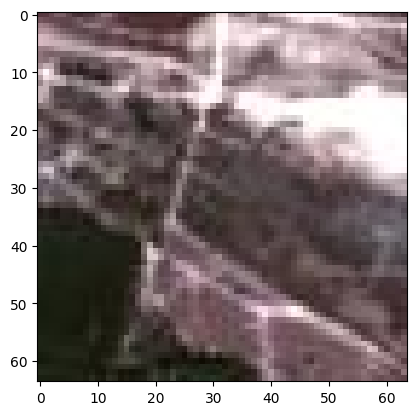

In [71]:
#Image dimensions
print("The image dimensions are: ")
print(image_data.shape)
print("\nSample image:")

plt.imshow(image_data)

Total number of non-agricultural land images in dataset: 3000
Memory loading: 0.280s, Shape: (3000, 64, 64, 3)
Successfully loaded 3000 non-agricultural images into memory


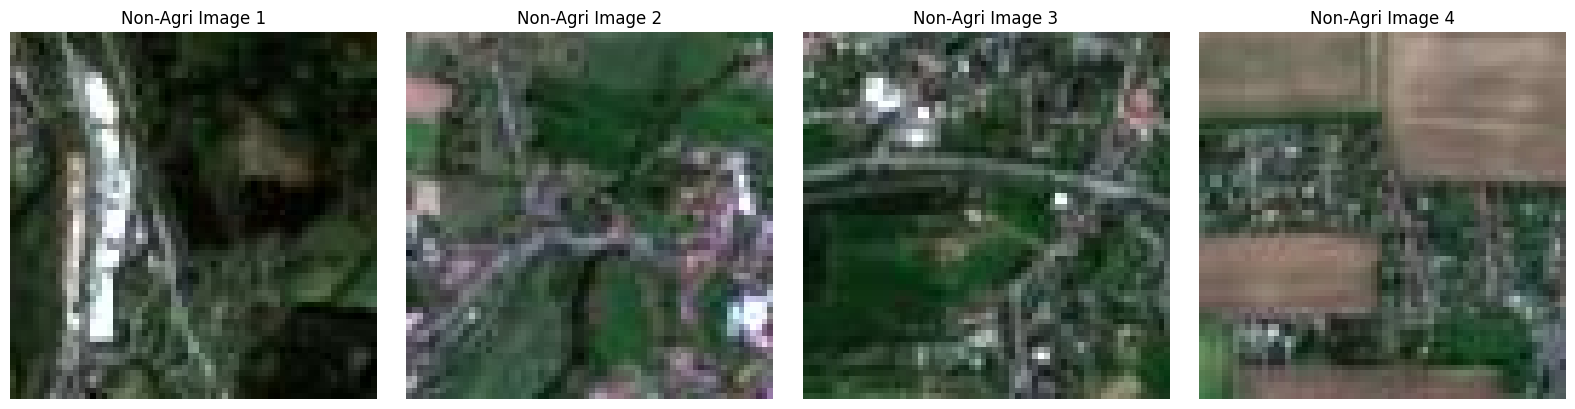

In [104]:
# Loop through all images in ./images_dataSAT/class_0_non_agri directory
# Read them all and save in non_agri_images list
# Memory loading
import time, os, numpy as np, matplotlib.pyplot as plt

start_time = time.time()
dir_non_agri = "./images_dataSAT/class_0_non_agri" 
non_agri_files = [f for f in os.listdir(dir_non_agri) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tiff'))]

print(f"Total number of non-agricultural land images in dataset: {len(non_agri_files)}")

non_agri_images = []
for file_name in non_agri_files:
    image_data = plt.imread(os.path.join(dir_non_agri, file_name))
    non_agri_images.append(image_data)

non_agri_images = np.array(non_agri_images)
print(f"Memory loading: {time.time() - start_time:.3f}s, Shape: {non_agri_images.shape}")
print(f"Successfully loaded {len(non_agri_images)} non-agricultural images into memory")

# Display first four images
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
    axes[i].imshow(non_agri_images[i])
    axes[i].set_title(f"Non-Agri Image {i+1}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

Total number of agricultural land images in dataset: 3000
Memory loading: 0.486s, Shape: (3000, 64, 64, 3)
Successfully loaded 3000 agricultural images into memory


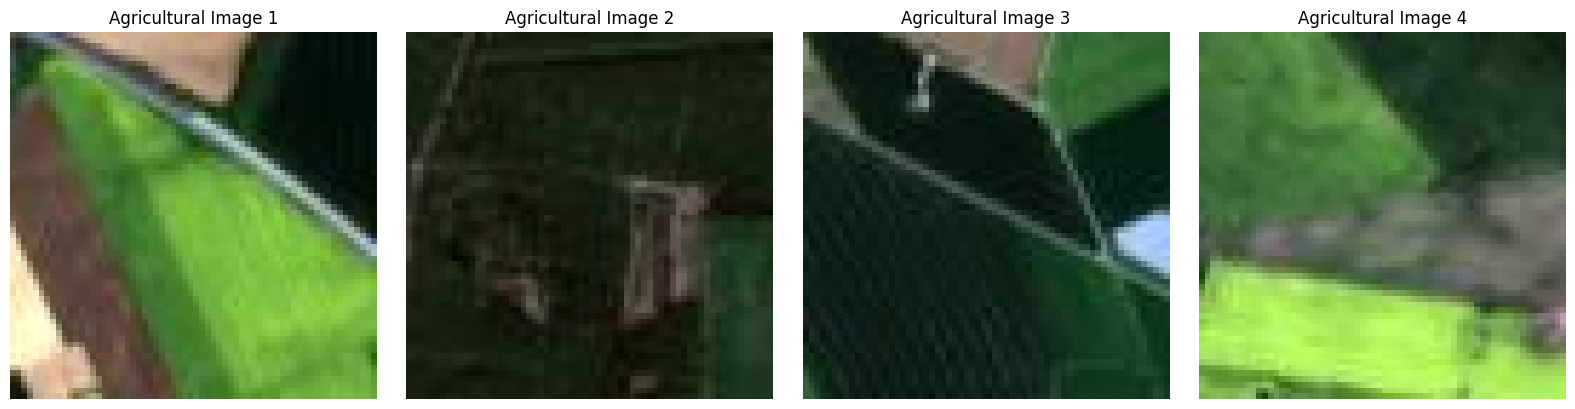

In [105]:
# Load AGRICULTURAL images (Class 1) - Memory loading approach
import time, os, numpy as np, matplotlib.pyplot as plt

start_time = time.time()
dir_agri = "./images_dataSAT/class_1_agri"
agri_files = [f for f in os.listdir(dir_agri) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tiff'))]

print(f"Total number of agricultural land images in dataset: {len(agri_files)}")

agri_images = []
for file_name in agri_files:
    image_data = plt.imread(os.path.join(dir_agri, file_name))
    agri_images.append(image_data)

agri_images = np.array(agri_images)
print(f"Memory loading: {time.time() - start_time:.3f}s, Shape: {agri_images.shape}")
print(f"Successfully loaded {len(agri_images)} agricultural images into memory")

# Display first four agricultural images
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
    axes[i].imshow(agri_images[i])
    axes[i].set_title(f"Agricultural Image {i+1}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()